# Behavioral Attunement to Abiotic Reins Simulations
Eden Forbes, Indiana University Cognitive Science

Import Libraries:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import heyoka as hy
import math

Define Constants

In [2]:
# Seasonal Constants
s_intensity = 2.0
s_length = 1.0
# Dormancy Constants
k = 45.0
exp = 4.0
# Other Constants
a = 0.001
d = 0.1
Ip = 10.0
Ou = 0.2
Ideal = 45.0
c = 200.0
x = 0.5

# Create symbolic variables.
s, r, q, g, h = hy.make_vars("s", "r", "q", "g", "h")

## Seasonal Parameter Scans

Scan Parameters:

In [4]:
p1_min = 0
p1_max = 5
p1_step = 0.05
p1_list = np.arange(p1_min, p1_max, p1_step)
p2_min = 1
p2_max = 20
p2_step = 0.2
p2_list = np.arange(p2_min, p2_max, p2_step)
timesteps = 1000
transient = 100

s_hist = np.zeros((len(p1_list), len(p2_list), timesteps))

cutoff = 0.1

#### Single Species without Dormancy

In [ ]:
for i in range(len(p1_list)):
    for j in range(len(p2_list)):
        s_intensity = p1_list[i]
        s_length = p2_list[j]
        ta = hy.taylor_adaptive(
                            sys = [(s, s * (1. - s/c) * (1. - a*(r - Ideal)**2) - d*s),
                             (r, x * s + Ip*(1. - s_intensity*hy.sin(hy.time/s_length)) - Ou*r)],
                            state = [20., 50.],
                            time = 0.
                            )
        t_grid = np.linspace(0, timesteps, timesteps)
        s_hist[i,j,:] = ta.propagate_grid(t_grid)[4][:,0]

In [ ]:
nodor_result = np.zeros((len(p1_list), len(p2_list)))
for i in range(len(p1_list)):
    for j in range(len(p2_list)):
        s_hist_op = s_hist[i,j, transient:]
        if all(i >= cutoff for i in s_hist_op):
            nodor_result[i,j] = np.mean(s_hist_op)
        else:
            nodor_result[i,j] = 0

In [ ]:
fig, ax = plt.subplots(1)
ax.imshow(nodor_result, cmap='hot', vmin = 0, vmax = 30, interpolation='nearest',aspect = 0.6)
plt.xlabel("Season Length (s_len)", fontsize = 9)
plt.ylabel("Season Intensity (s_int)", fontsize = 9);
xtix = ['0','1', '5', '9', '13','17']
ax.set_xticklabels(xtix)
ytix = ['0','0', '1', '2', '3', '4']
ax.set_yticklabels(ytix)
plt.gca().invert_yaxis()
plt.show()

#### Single Species with Dormancy

In [34]:
for i in range(len(p1_list)):
    for j in range(len(p2_list)):
        s_intensity = p1_list[i]
        s_length = p2_list[j]
        ta = hy.taylor_adaptive(
                            sys = [(s, (k**exp/(k**exp + r**exp)) * s * (1. - s/c) * (1. - a*(r - Ideal)**2) - d*s),
                             (r, (k**exp/(k**exp + r**exp)) * x * s + Ip*(1. - s_intensity*hy.sin(hy.time/s_length)) - Ou*r)],
                            state = [20., 50.],
                            time = 0.
                            )
        t_grid = np.linspace(0, timesteps, timesteps)
        s_hist[i,j,:] = ta.propagate_grid(t_grid)[4][:,0]

KeyboardInterrupt: 

In [8]:
dor_result = np.zeros((len(p1_list), len(p2_list)))
for i in range(len(p1_list)):
    for j in range(len(p2_list)):
        s_hist_op = s_hist[i,j, transient:]
        if all(i >= cutoff for i in s_hist_op):
            dor_result[i,j] = np.mean(s_hist_op)
        else:
            dor_result[i,j] = 0

/var/folders/j4/tsvjz3bd0qqbj4jtzrw1sy8c0000gn/T/ipykernel_29167/1320687286.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xtix)
/var/folders/j4/tsvjz3bd0qqbj4jtzrw1sy8c0000gn/T/ipykernel_29167/1320687286.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ytix)


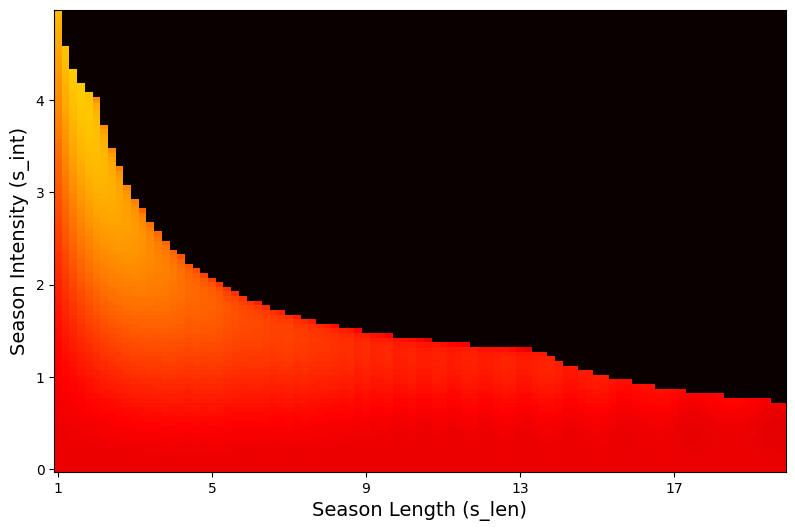

In [46]:
fig, ax = plt.subplots(1)
ax.imshow(dor_result, cmap='hot', vmin = 0, vmax = 90, interpolation='nearest',aspect = 0.6)
plt.xlabel("Season Length (s_len)", fontsize = 14)
plt.ylabel("Season Intensity (s_int)", fontsize = 14);
xtix = ['0','1', '5', '9', '13','17']
ax.set_xticklabels(xtix)
ytix = ['0','0', '1', '2', '3', '4']
ax.set_yticklabels(ytix)
plt.gca().invert_yaxis()
plt.show()

#### Rein Control without Dormancy

In [202]:
# p1_min = 0
# p1_max = 6
# p1_step = 0.2
# p1_list = np.arange(p1_min, p1_max, p1_step)
# p2_min = 1
# p2_max = 200
# p2_step = 1
# p2_list = np.arange(p2_min, p2_max, p2_step)

# s_hist = np.zeros((len(p1_list), len(p2_list), timesteps))

In [7]:
for i in range(len(p1_list)):
    for j in range(len(p2_list)):
        s_intensity = p1_list[i]
        s_length = p2_list[j]
        ta = hy.taylor_adaptive(
                            sys = [(s, s * (1. - (s+q)/c) * (1. - a*(r - Ideal)**2) - d*s),
                             (q, q * (1. - (s+q)/c) * (1. - a*(r - Ideal)**2) - d*q),
                             (r, x * (s-q) + Ip*(1. - s_intensity*hy.sin(hy.time/s_length)) - Ou*r)],
                            state = [20., 20., 50.],
                            time = 0.
                            )
        t_grid = np.linspace(0, timesteps, timesteps)
        s_hist[i,j,:] = ta.propagate_grid(t_grid)[4][:,0]

In [8]:
rein_cc_result = np.zeros((len(p1_list), len(p2_list)))
for i in range(len(p1_list)):
    for j in range(len(p2_list)):
        s_hist_op = s_hist[i,j, transient:]
        if all(i >= cutoff for i in s_hist_op):
            rein_cc_result[i,j] = np.mean(s_hist_op)
        else:
            rein_cc_result[i,j] = 0

/opt/anaconda3/envs/ARC/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/anaconda3/envs/ARC/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


/var/folders/j4/tsvjz3bd0qqbj4jtzrw1sy8c0000gn/T/ipykernel_49049/2395167507.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xtix)
/var/folders/j4/tsvjz3bd0qqbj4jtzrw1sy8c0000gn/T/ipykernel_49049/2395167507.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ytix)


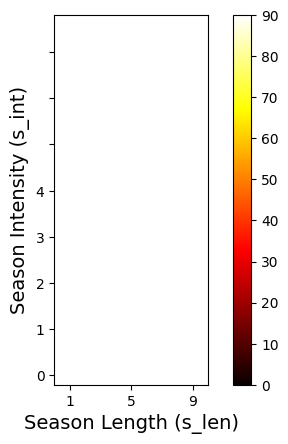

In [13]:
fig, ax = plt.subplots(1)
im = ax.imshow(rein_cc_result, cmap='hot', vmin = 0, vmax = 90, interpolation='nearest',aspect = 0.6)
plt.colorbar(im)
plt.xlabel("Season Length (s_len)", fontsize = 14)
plt.ylabel("Season Intensity (s_int)", fontsize = 14);
xtix = ['0','1', '5', '9', '13','17']
ax.set_xticklabels(xtix)
ytix = ['0','0', '1', '2', '3', '4']
ax.set_yticklabels(ytix)

plt.gca().invert_yaxis()
plt.show()

#### Rein Control with Dormancy

In [74]:
for i in range(len(p1_list)):
    for j in range(len(p2_list)):
        s_intensity = p1_list[i]
        s_length = p2_list[j]
        ta = hy.taylor_adaptive(
                            sys = [(s, (k**exp/(k**exp + r**exp)) * s * (1. - (s+q)/c) * (1. - a*(r - Ideal)**2) - d*s),
                             (q, (r**exp/(k**exp + r**exp)) * q * (1. - (s+q)/c) * (1. - a*(r - Ideal)**2) - d*q),
                             (r, x * (s*(k**exp/(k**exp + r**exp))-q*(r**exp/(k**exp + r**exp))) + Ip*(1. - s_intensity*hy.sin(hy.time/s_length)) - Ou*r)],
                            state = [20., 20., 50.],
                            time = 0.
                            )
        t_grid = np.linspace(0, timesteps, timesteps)
        s_hist[i,j,:] = ta.propagate_grid(t_grid)[4][:,0]

In [75]:
rein_dor_result = np.zeros((len(p1_list), len(p2_list)))
for i in range(len(p1_list)):
    for j in range(len(p2_list)):
        s_hist_op = s_hist[i,j, transient:]
        if all(i >= cutoff for i in s_hist_op):
            rein_dor_result[i,j] = np.mean(s_hist_op)
        else:
            rein_dor_result[i,j] = 0

/var/folders/j4/tsvjz3bd0qqbj4jtzrw1sy8c0000gn/T/ipykernel_29167/2716031047.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xtix)
/var/folders/j4/tsvjz3bd0qqbj4jtzrw1sy8c0000gn/T/ipykernel_29167/2716031047.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ytix)


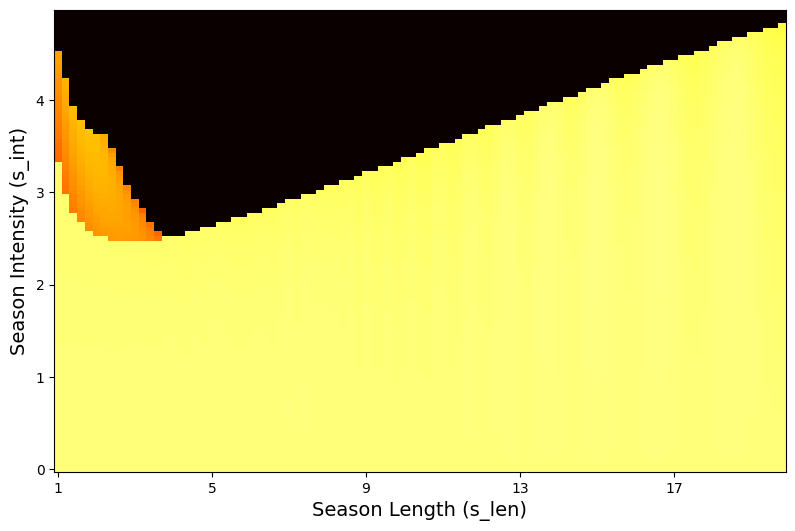

In [76]:
fig, ax = plt.subplots(1)
ax.imshow(rein_dor_result, cmap='hot', vmin = 0, vmax = 90, interpolation='nearest',aspect = 0.6)
plt.xlabel("Season Length (s_len)", fontsize = 14)
plt.ylabel("Season Intensity (s_int)", fontsize = 14);
xtix = ['0','1', '5', '9', '13','17']
ax.set_xticklabels(xtix)
ytix = ['0','0', '1', '2', '3', '4']
ax.set_yticklabels(ytix)
plt.gca().invert_yaxis()
plt.show()

#### Expanded Rein Control with Dormancy 

Updated Scan Parameters

In [4]:
timesteps = 5000
transient = 100

p1_min = 0
p1_max = 9
p1_step = 0.2
p1_list = np.arange(p1_min, p1_max, p1_step)
p2_min = 1
p2_max = 500
p2_step = 2
p2_list = np.arange(p2_min, p2_max, p2_step)

s_hist = np.zeros((len(p1_list), len(p2_list), timesteps))

In [40]:
for i in range(len(p1_list)):
    for j in range(len(p2_list)):
        s_intensity = p1_list[i]
        s_length = p2_list[j]
        ta = hy.taylor_adaptive(
                            sys = [(s, (k**exp/(k**exp + r**exp)) * s * (1. - (s+q)/c) * (1. - a*(r - Ideal)**2) - d*s),
                             (q, (r**exp/(k**exp + r**exp)) * q * (1. - (s+q)/c) * (1. - a*(r - Ideal)**2) - d*q),
                             (r, x * (s*(k**exp/(k**exp + r**exp))-q*(r**exp/(k**exp + r**exp))) + Ip*(1. - s_intensity*hy.sin(hy.time/s_length)) - Ou*r)],
                            state = [20., 20., 50.],
                            time = 0.
                            )
        t_grid = np.linspace(0, timesteps, timesteps)
        s_hist[i,j,:] = ta.propagate_grid(t_grid)[4][:,0]

In [41]:
rein_dor_long_result = np.zeros((len(p1_list), len(p2_list)))
for i in range(len(p1_list)):
    for j in range(len(p2_list)):
        s_hist_op = s_hist[i,j, transient:]
        if all(i >= cutoff for i in s_hist_op):
            rein_dor_long_result[i,j] = np.mean(s_hist_op)
        else:
            rein_dor_long_result[i,j] = 0

In [1]:
fig, ax = plt.subplots(1)
ax.imshow(rein_dor_long_result, cmap='hot', vmin = 0, vmax = 90, interpolation='nearest', aspect = 1.5)
plt.xlabel("Season Length (s_len)", fontsize = 14)
plt.ylabel("Season Intensity (s_int)", fontsize = 14);
xtix = ['0','1', '100', '200', '300','400']
ax.set_xticklabels(xtix)
ytix = ['0','0', '1', '2', '3', '4', '5', '6', '7', '8']
ax.set_yticklabels(ytix)
plt.gca().invert_yaxis()
plt.show()

NameError: name 'plt' is not defined

## Daisyworld Comparisons

Scan Parameter Updates:

In [4]:
timesteps = 1000
transient = 100

#### No Dormancy, No Rein Control

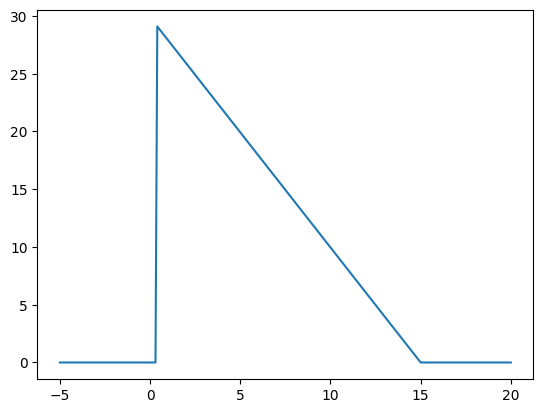

In [6]:
IpR = np.linspace(-5, 20, 251)
l_result = np.zeros(len(IpR))
s_hist = np.zeros((len(IpR), timesteps))

for i in range(len(IpR)):
    ta = hy.taylor_adaptive(
                        sys = [(s, s * (1. - s/c) * (1. - a*(r - Ideal)**2) - d*s),
                         (r,x * s + IpR[i] - Ou*r)],
                        state = [20., (IpR[i]/Ou)],
                        time = 0.
                        )
    t_grid = np.linspace(0, timesteps, timesteps)
    s_hist[i,:] = ta.propagate_grid(t_grid)[4][:,0]
    l_result[i] = s_hist[i,-1]
    
plt.plot(IpR, l_result)

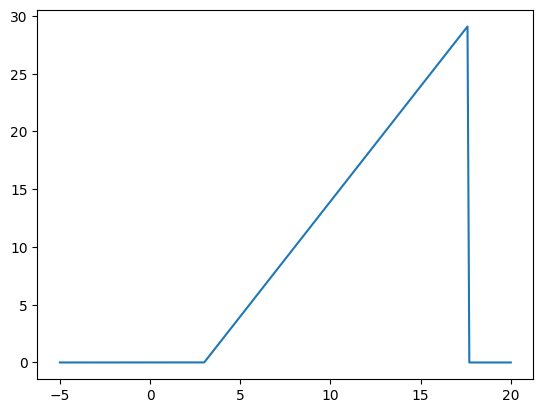

In [7]:
IpR = np.linspace(-5, 20, 251)
r_result = np.zeros(len(IpR))
s_hist = np.zeros((len(IpR), timesteps))

for i in range(len(IpR)):
    ta = hy.taylor_adaptive(
                        sys = [(s, s * (1. - s/c) * (1. - a*(r - Ideal)**2) - d*s),
                         (r,x * (-s) + IpR[i] - Ou*r)],
                        state = [20., (IpR[i]/Ou)],
                        time = 0.
                        )
    t_grid = np.linspace(0, timesteps, timesteps)
    s_hist[i,:] = ta.propagate_grid(t_grid)[4][:,0]
    r_result[i] = s_hist[i,-1]
    
plt.plot(IpR, r_result)

#### Dormancy, No Rein Control

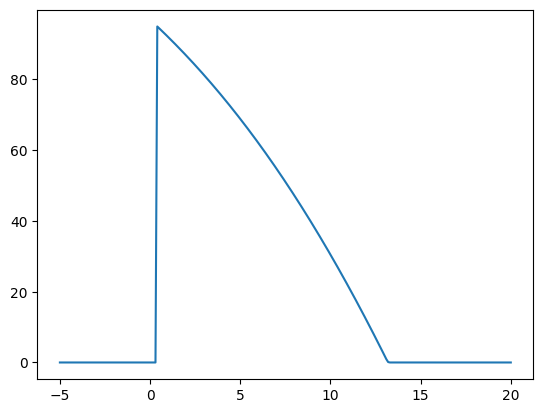

In [8]:
IpR = np.linspace(-5, 20, 251)
dl_result = np.zeros(len(IpR))
s_hist = np.zeros((len(IpR), timesteps))

for i in range(len(IpR)):
    ta = hy.taylor_adaptive(
                        sys = [(s, (k**exp/(k**exp + r**exp)) * s * (1. - s/c) * (1. - a*(r - Ideal)**2) - d*s),
                         (r,(k**exp/(k**exp + r**exp)) * x * s + IpR[i] - Ou*r)],
                        state = [20., (IpR[i]/Ou)],
                        time = 0.
                        )
    t_grid = np.linspace(0, timesteps, timesteps)
    s_hist[i,:] = ta.propagate_grid(t_grid)[4][:,0]
    dl_result[i] = s_hist[i,-1]
    
plt.plot(IpR, dl_result)

                        

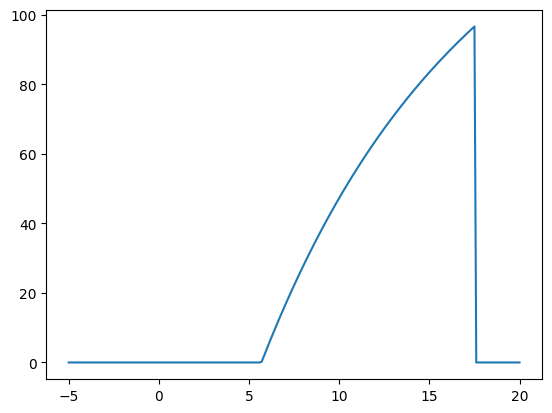

In [9]:
IpR = np.linspace(-5, 20, 251)
dr_result = np.zeros(len(IpR))
s_hist = np.zeros((len(IpR), timesteps))

for i in range(len(IpR)):
    ta = hy.taylor_adaptive(
                        sys = [(s, (r**exp/(k**exp + r**exp)) * s * (1. - s/c) * (1. - a*(r - Ideal)**2) - d*s),
                         (r,(r**exp/(k**exp + r**exp)) * x * -s + IpR[i] - Ou*r)],
                        state = [20., (IpR[i]/Ou)],
                        time = 0.
                        )
    t_grid = np.linspace(0, timesteps, timesteps)
    s_hist[i,:] = ta.propagate_grid(t_grid)[4][:,0]
    dr_result[i] = s_hist[i,-1]
    
plt.plot(IpR, dr_result)

#### Rein Control, No Dormancy

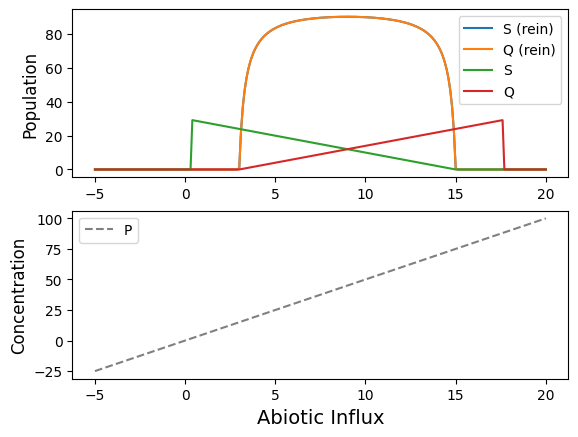

In [11]:
IpR = np.linspace(-5, 20, 251)
s_result = np.zeros(len(IpR))
q_result = np.zeros(len(IpR))
re_result = np.zeros(len(IpR))

for i in range(len(IpR)):
    ta = hy.taylor_adaptive(
        sys = [(s, s * (1. - (s+q)/c) * (1. - a*(r - Ideal)**2) - d*s),
        (q, q * (1. - (s+q)/c) * (1. - a*(r - Ideal)**2) - d*q),
        (r, x * (s-q) + IpR[i] - Ou*r)],
        state = [20., 20., (IpR[i]/Ou)],
        time = 0.
        )
    t_grid = np.linspace(0, timesteps, timesteps)
    r_grid = ta.propagate_grid(t_grid)[4]
    s_result[i] = r_grid[-1,0]
    q_result[i] = r_grid[-1,1]
    re_result[i] = r_grid[-1,2]

fig, ax = plt.subplots(2)
ax[0].plot(IpR, s_result, label="S (rein)")
ax[0].plot(IpR, q_result, label="Q (rein)")
ax[0].plot(IpR, l_result, label="S")
ax[0].plot(IpR, r_result, label="Q")
ax[0].set_ylabel("Population", fontsize = 12)
ax[0].legend()
ax[1].plot(IpR, re_result, label="P", linestyle="dashed", color="gray")
ax[1].set_ylabel("Concentration", fontsize = 12)
ax[1].legend()
plt.xlabel("Abiotic Influx", fontsize = 14)
plt.show()

#### Rein Control, Dormancy

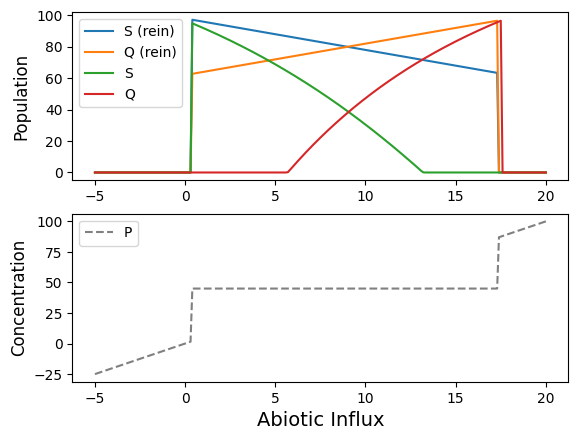

In [12]:
IpR = np.linspace(-5, 20, 251)
ds_result = np.zeros(len(IpR))
dq_result = np.zeros(len(IpR))
dre_result = np.zeros(len(IpR))

for i in range(len(IpR)):
    ta = hy.taylor_adaptive(
                        sys = [(s, (k**exp/(k**exp + r**exp)) * s * (1. - (s+q)/c) * (1. - a*(r - Ideal)**2) - d*s),
                         (q, (r**exp/(k**exp + r**exp)) * q * (1. - (s+q)/c) * (1. - a*(r - Ideal)**2) - d*q),
                         (r, x * (s*(k**exp/(k**exp + r**exp))-q*(r**exp/(k**exp + r**exp))) + IpR[i] - Ou*r)],
                        state = [20., 20., (IpR[i]/Ou)],
                        time = 0.)
    t_grid = np.linspace(0, timesteps, timesteps)
    r_grid = ta.propagate_grid(t_grid)[4]
    ds_result[i] = r_grid[-1,0]
    dq_result[i] = r_grid[-1,1]
    dre_result[i] = r_grid[-1,2]
    
fig, ax = plt.subplots(2)
ax[0].plot(IpR, ds_result, label="S (rein)")
ax[0].plot(IpR, dq_result, label="Q (rein)")
ax[0].plot(IpR, dl_result, label="S")
ax[0].plot(IpR, dr_result, label="Q")
ax[0].set_ylabel("Population", fontsize = 12)
ax[0].legend()
ax[1].plot(IpR, dre_result, label="P", linestyle="dashed", color="gray")
ax[1].set_ylabel("Concentration", fontsize = 12)
ax[1].legend()
plt.xlabel("Abiotic Influx", fontsize = 14)
plt.show()